In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import API Weather Key 
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [5]:
# Perform an API call with the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?&units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as e:
        print(e)
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | richards bay
Processing Record 2 of Set 1 | tabiauea
'coord'
Processing Record 3 of Set 1 | igarka
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | dingle
Processing Record 6 of Set 1 | aflu
'coord'
Processing Record 7 of Set 1 | araouane
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | bam
Processing Record 12 of Set 1 | felanitx
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | gao
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | taolanaro
'coord'
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | guiratinga
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | yeppoon
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | hanchuan
Processing Record 23 of Set 1 | bare

Processing Record 48 of Set 4 | haines junction
Processing Record 49 of Set 4 | henties bay
Processing Record 50 of Set 4 | rudiskes
Processing Record 1 of Set 5 | asayita
'coord'
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | lolua
'coord'
Processing Record 4 of Set 5 | buala
Processing Record 5 of Set 5 | porto seguro
Processing Record 6 of Set 5 | grand centre
'coord'
Processing Record 7 of Set 5 | the valley
Processing Record 8 of Set 5 | warqla
'coord'
Processing Record 9 of Set 5 | san carlos de bariloche
Processing Record 10 of Set 5 | el badari
'coord'
Processing Record 11 of Set 5 | saskylakh
Processing Record 12 of Set 5 | port macquarie
Processing Record 13 of Set 5 | atar
Processing Record 14 of Set 5 | mys shmidta
'coord'
Processing Record 15 of Set 5 | krasnoselkup
Processing Record 16 of Set 5 | moranbah
Processing Record 17 of Set 5 | longyearbyen
Processing Record 18 of Set 5 | bambous virieux
Processing Record 19 of Set 5 | sheridan
Processi

Processing Record 42 of Set 8 | itacoatiara
Processing Record 43 of Set 8 | samalaeulu
'coord'
Processing Record 44 of Set 8 | rawson
Processing Record 45 of Set 8 | ibirama
Processing Record 46 of Set 8 | mundo nuevo
Processing Record 47 of Set 8 | bolhrad
Processing Record 48 of Set 8 | port hardy
Processing Record 49 of Set 8 | aras
Processing Record 50 of Set 8 | nishihara
Processing Record 1 of Set 9 | vardo
Processing Record 2 of Set 9 | bolungarvik
'coord'
Processing Record 3 of Set 9 | champerico
Processing Record 4 of Set 9 | husavik
Processing Record 5 of Set 9 | sambava
Processing Record 6 of Set 9 | codrington
Processing Record 7 of Set 9 | laramie
Processing Record 8 of Set 9 | fukue
Processing Record 9 of Set 9 | miandrivazo
Processing Record 10 of Set 9 | luxeuil-les-bains
Processing Record 11 of Set 9 | comodoro rivadavia
Processing Record 12 of Set 9 | mandalay
Processing Record 13 of Set 9 | ishii
Processing Record 14 of Set 9 | deder
Processing Record 15 of Set 9 | s

Processing Record 36 of Set 12 | williams lake
Processing Record 37 of Set 12 | zbarazh
Processing Record 38 of Set 12 | bur gabo
'coord'
Processing Record 39 of Set 12 | inongo
Processing Record 40 of Set 12 | guerrero negro
Processing Record 41 of Set 12 | ust-kuyga
Processing Record 42 of Set 12 | tidore
'coord'
Processing Record 43 of Set 12 | imeni poliny osipenko
Processing Record 44 of Set 12 | erzin
Processing Record 45 of Set 12 | nanakuli
Processing Record 46 of Set 12 | ayia galini
Processing Record 47 of Set 12 | olinda
Processing Record 48 of Set 12 | novochernorechenskiy
Processing Record 49 of Set 12 | narsaq
Processing Record 50 of Set 12 | lindi
Processing Record 1 of Set 13 | karratha
Processing Record 2 of Set 13 | springdale
Processing Record 3 of Set 13 | sirjan
Processing Record 4 of Set 13 | sibolga
Processing Record 5 of Set 13 | wanaka
Processing Record 6 of Set 13 | vestmanna
Processing Record 7 of Set 13 | havre-saint-pierre
Processing Record 8 of Set 13 | ab

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Richards Bay,-28.7830,32.0377,76.53,83,8,15.95,ZA,2022-01-28 01:29:09
1,Igarka,67.4667,86.5833,-0.92,93,100,23.15,RU,2022-01-28 01:32:14
2,Atuona,-9.8000,-139.0333,78.24,74,7,16.73,PF,2022-01-28 01:32:15
3,Dingle,10.9995,122.6711,83.26,76,88,8.14,PH,2022-01-28 01:32:15
4,Araouane,18.9048,-3.5265,64.06,18,33,12.21,ML,2022-01-28 01:32:16
5,Kapaa,22.0752,-159.3190,80.58,68,0,1.99,US,2022-01-28 01:32:16
6,Bredasdorp,-34.5322,20.0403,63.28,82,0,4.61,ZA,2022-01-28 01:32:16
7,Barrow,71.2906,-156.7887,-18.38,76,0,9.22,US,2022-01-28 01:32:17
8,Bam,29.1060,58.3570,58.59,34,1,6.06,IR,2022-01-28 01:32:17
9,Felanitx,39.4696,3.1483,45.45,68,0,3.00,ES,2022-01-28 01:32:17


In [8]:
# Reorder the columns
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Assign City Data df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Richards Bay,ZA,2022-01-28 01:29:09,-28.7830,32.0377,76.53,83,8,15.95
1,Igarka,RU,2022-01-28 01:32:14,67.4667,86.5833,-0.92,93,100,23.15
2,Atuona,PF,2022-01-28 01:32:15,-9.8000,-139.0333,78.24,74,7,16.73
3,Dingle,PH,2022-01-28 01:32:15,10.9995,122.6711,83.26,76,88,8.14
4,Araouane,ML,2022-01-28 01:32:16,18.9048,-3.5265,64.06,18,33,12.21
...,...,...,...,...,...,...,...,...,...
559,Santa Rosalia,MX,2022-01-28 01:47:29,27.3167,-112.2833,59.72,51,82,7.05
560,Waipawa,NZ,2022-01-28 01:47:29,-41.4122,175.5153,64.92,48,32,8.14
561,Koumac,NC,2022-01-28 01:47:29,-20.5667,164.2833,87.30,62,59,6.26
562,Wad Madani,SD,2022-01-28 01:47:30,14.4012,33.5199,62.37,16,0,14.41


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

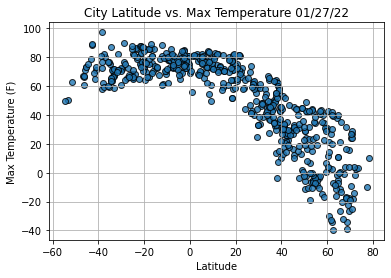

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

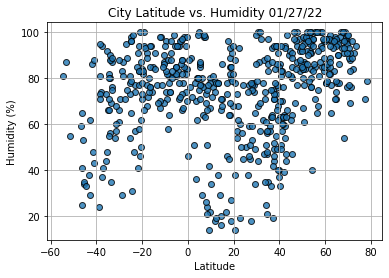

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

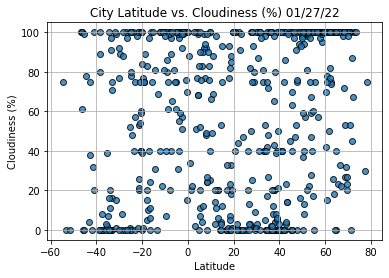

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

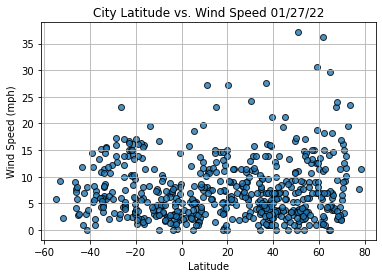

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [58]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2022-01-28 01:32:20
Lat                         -46.6
Lng                      168.3333
Max Temp                    66.79
Humidity                       59
Cloudiness                    100
Wind Speed                   8.99
Name: 13, dtype: object

In [59]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
559     True
560    False
561    False
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [60]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Igarka,RU,2022-01-28 01:32:14,67.4667,86.5833,-0.92,93,100,23.15
3,Dingle,PH,2022-01-28 01:32:15,10.9995,122.6711,83.26,76,88,8.14
4,Araouane,ML,2022-01-28 01:32:16,18.9048,-3.5265,64.06,18,33,12.21
5,Kapaa,US,2022-01-28 01:32:16,22.0752,-159.3190,80.58,68,0,1.99
7,Barrow,US,2022-01-28 01:32:17,71.2906,-156.7887,-18.38,76,0,9.22
...,...,...,...,...,...,...,...,...,...
557,Shaunavon,CA,2022-01-28 01:47:28,49.6501,-108.4181,22.78,85,97,9.31
558,Celina,US,2022-01-28 01:46:14,40.5489,-84.5702,30.65,94,100,6.87
559,Santa Rosalia,MX,2022-01-28 01:47:29,27.3167,-112.2833,59.72,51,82,7.05
562,Wad Madani,SD,2022-01-28 01:47:30,14.4012,33.5199,62.37,16,0,14.41


In [61]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Igarka,RU,2022-01-28 01:32:14,67.4667,86.5833,-0.92,93,100,23.15
3,Dingle,PH,2022-01-28 01:32:15,10.9995,122.6711,83.26,76,88,8.14
4,Araouane,ML,2022-01-28 01:32:16,18.9048,-3.5265,64.06,18,33,12.21
5,Kapaa,US,2022-01-28 01:32:16,22.0752,-159.3190,80.58,68,0,1.99
7,Barrow,US,2022-01-28 01:32:17,71.2906,-156.7887,-18.38,76,0,9.22


In [62]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

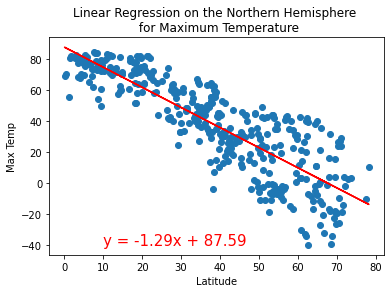

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature','Max Temp',(10,-40))

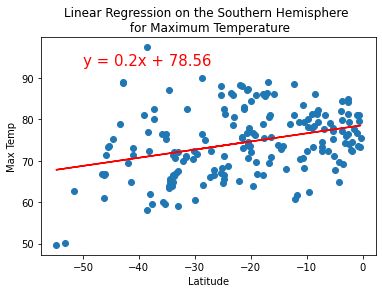

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,93))

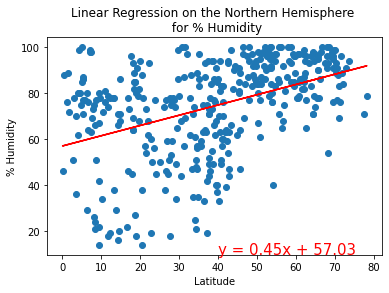

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

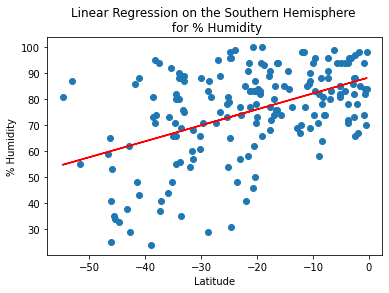

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

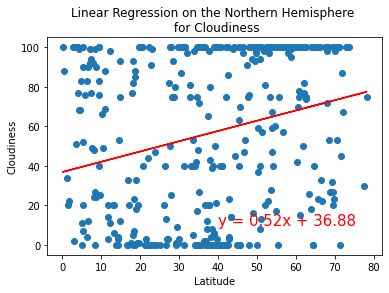

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

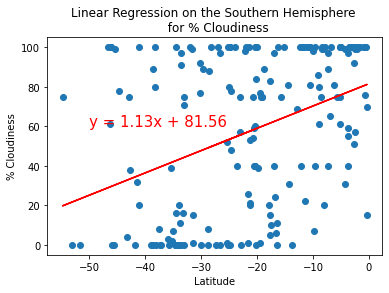

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for % Cloudiness', '% Cloudiness',(-50,60))

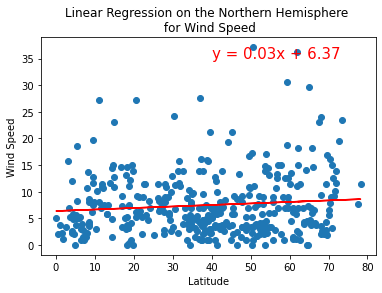

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

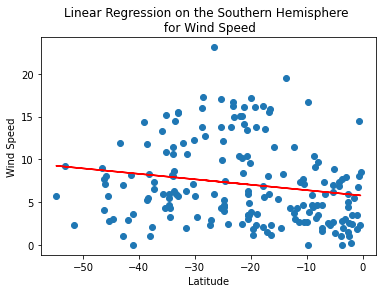

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))